In [1]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda, Dropout, ELU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def build_model(og_img_shape):

    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape = og_img_shape))

    model.add(Conv2D(24, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(36, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(48, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation = 'elu'))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dense(10, activation = 'elu'))
    model.add(Dense(1))

    model.summary()

    return model

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt
import cv2

In [16]:
img = cv2.imread('racetrack.jpg')

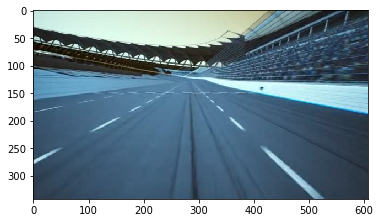

In [15]:
plt.imshow(cv2.imread('racetrack.jpg'))

In [17]:
img.shape

(342, 608, 3)

In [18]:
model = build_model(img.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 342, 608, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 171, 304, 24)      1824      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 152, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 76, 36)        21636     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 38, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 19, 48)        43248     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 9, 48)         

In [20]:
import numpy as np

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
model.fit(img.reshape(1, 342, 608, 3), np.array([2]))

Epoch 1/1
1/1 [==============================] - 1s 627ms/step - loss: 30.8499


In [38]:
model.predict(img.reshape(1, 342, 608, 3))

array([[-0.03776127]], dtype=float32)

In [30]:
img.reshape(1, 342, 608, 3)

array([[[[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 29,  33,  27],
         [ 27,  34,  27],
         [ 28,  35,  28]],

        [[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 30,  34,  28],
         [ 28,  35,  28],
         [ 28,  35,  28]],

        [[195, 228, 221],
         [195, 228, 221],
         [195, 228, 221],
         ...,
         [ 29,  35,  30],
         [ 30,  36,  31],
         [ 30,  36,  31]],

        ...,

        [[ 46,  62,  79],
         [ 46,  62,  79],
         [ 46,  62,  79],
         ...,
         [ 41,  50,  63],
         [ 41,  50,  63],
         [ 41,  50,  63]],

        [[ 46,  62,  79],
         [ 46,  62,  79],
         [ 46,  62,  79],
         ...,
         [ 41,  50,  63],
         [ 41,  50,  63],
         [ 41,  50,  63]],

        [[ 45,  61,  78],
         [ 45,  61,  78],
         [ 45,  61,  78],
         ...,
         [ 41,  50,  63],
        